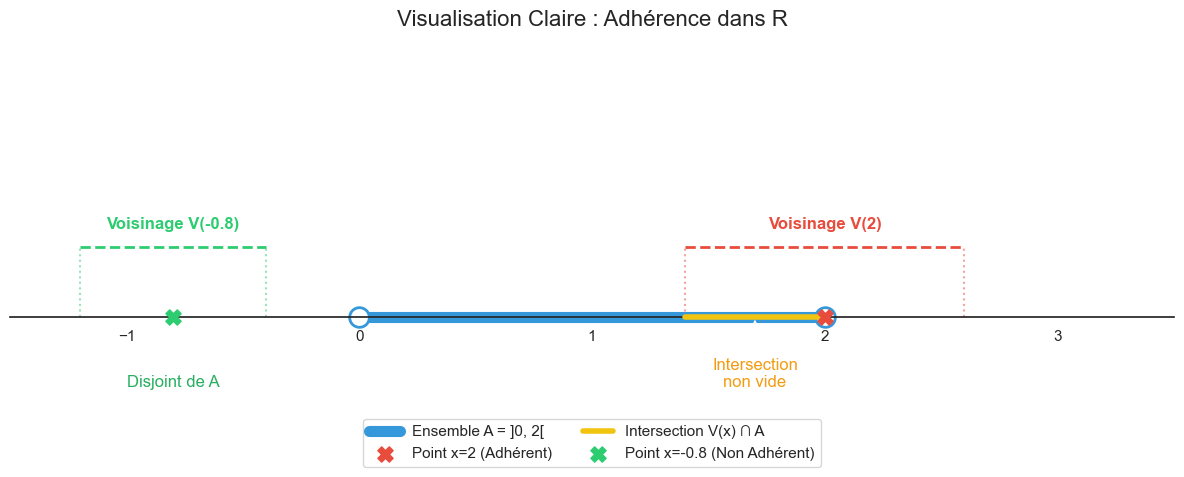

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme(style="white")

def visualiser_adherence_claire():
    fig, ax = plt.subplots(figsize=(12, 5))

    # Configuration de l'axe
    ax.set_ylim(-0.5, 1.5)
    ax.set_xlim(-1.5, 3.5)
    ax.get_yaxis().set_visible(False)

    # Supprimer les bordures inutiles
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_position('zero') # L'axe X est au centre

    # 1. L'ensemble A = ]0, 2[
    # Ligne épaisse bleue sur l'axe
    ax.plot([0, 2], [0, 0], color='#3498db', linewidth=8, label='Ensemble A = ]0, 2[', zorder=1)
    # Bornes ouvertes (cercles blancs) pour montrer l'exclusion de 0 et 2
    ax.scatter([0, 2], [0, 0], s=200, facecolors='white', edgecolors='#3498db', linewidth=2, zorder=2)

    # -------------------------------------------------------
    # CAS 1 : Point Adhérent x = 2
    # -------------------------------------------------------
    x1 = 2
    eps1 = 0.6
    y_level = 0.4

    # Le point x
    ax.scatter(x1, 0, s=120, color='#e74c3c', marker='X', label='Point x=2 (Adhérent)', zorder=10)

    # Le voisinage (intervalle au-dessus)
    ax.plot([x1 - eps1, x1 + eps1], [y_level, y_level], color='#e74c3c', linestyle='--', linewidth=2)
    # Lignes de projection verticales
    ax.vlines([x1 - eps1, x1 + eps1], 0, y_level, color='#e74c3c', linestyle=':', alpha=0.5)
    ax.text(x1, y_level + 0.1, f"Voisinage V({x1})", color='#e74c3c', ha='center', fontweight='bold')

    # L'intersection (partie jaune sur l'axe)
    # Intersection de ]2-eps, 2+eps[ avec A est ]2-eps, 2[
    ax.plot([x1 - eps1, 2], [0, 0], color='#f1c40f', linewidth=4, zorder=3, label='Intersection V(x) ∩ A')

    ax.annotate("Intersection\nnon vide", xy=(1.7, 0), xytext=(1.7, -0.4),
                arrowprops=dict(facecolor='#f1c40f', arrowstyle="->"), color='#f39c12', ha='center')

    # -------------------------------------------------------
    # CAS 2 : Point NON Adhérent x = -0.8
    # -------------------------------------------------------
    x2 = -0.8
    eps2 = 0.4

    # Le point x
    ax.scatter(x2, 0, s=120, color='#2ecc71', marker='X', label='Point x=-0.8 (Non Adhérent)', zorder=10)

    # Le voisinage
    ax.plot([x2 - eps2, x2 + eps2], [y_level, y_level], color='#2ecc71', linestyle='--', linewidth=2)
    ax.vlines([x2 - eps2, x2 + eps2], 0, y_level, color='#2ecc71', linestyle=':', alpha=0.5)
    ax.text(x2, y_level + 0.1, f"Voisinage V({x2})", color='#2ecc71', ha='center', fontweight='bold')

    ax.annotate("Disjoint de A", xy=(x2, 0), xytext=(x2, -0.4),
                arrowprops=dict(facecolor='#2ecc71', arrowstyle="->"), color='#27ae60', ha='center')

    plt.title("Visualisation Claire : Adhérence dans R", fontsize=16, pad=20)
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2, frameon=True)
    plt.tight_layout()
    plt.show()

visualiser_adherence_claire()


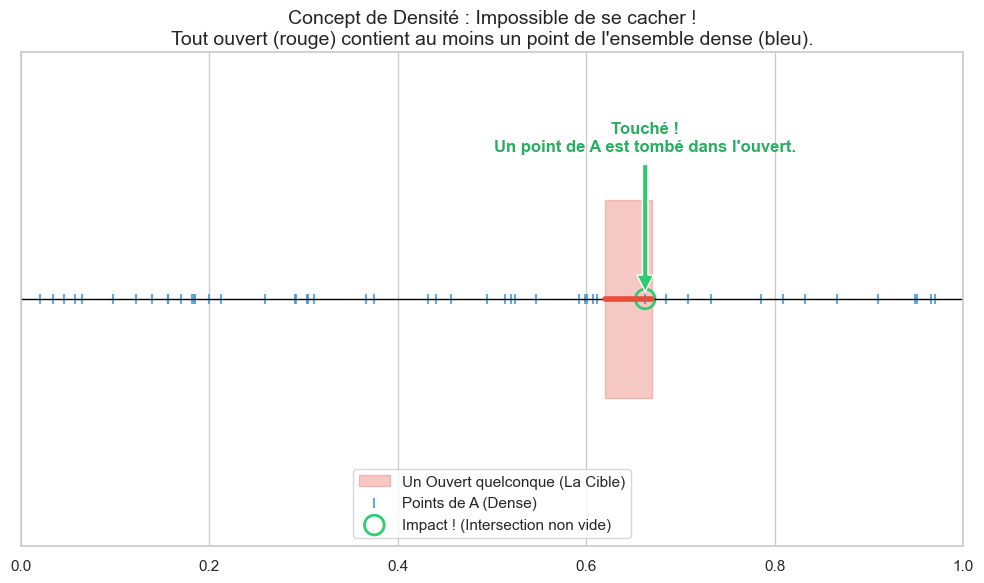

In [3]:

sns.set_theme(style="whitegrid")

def visualiser_densite():
    fig, ax = plt.subplots(figsize=(10, 6))

    # 1. L'Espace X (Ligne noire)
    ax.axhline(0, color='black', linewidth=1)
    ax.set_xlim(0, 1)
    ax.set_ylim(-0.5, 0.5)
    ax.get_yaxis().set_visible(False)

    # 2. La "Cible" (Un ouvert arbitraire, rouge)
    # C'est un petit intervalle ]a, b[
    target_start = 0.62
    target_width = 0.05
    target_end = target_start + target_width

    # On dessine la zone cible
    ax.fill_between([target_start, target_end], -0.2, 0.2, color='#e74c3c', alpha=0.3, label='Un Ouvert quelconque (La Cible)')
    ax.plot([target_start, target_end], [0, 0], color='#e74c3c', linewidth=4)

    # 3. L'Ensemble Dense A (Points bleus)
    # On simule une suite de points (par exemple une suite pseudo-aléatoire ou fractionnaire)
    # Pour l'illustration, prenons des points aléatoires uniformes
    np.random.seed(42)
    n_points = 50
    points_A = np.random.uniform(0, 1, n_points)

    # On les affiche progressivement pour montrer qu'ils finissent par toucher la cible
    ax.scatter(points_A, np.zeros_like(points_A), color='#3498db', s=50, alpha=0.8, marker='|', label='Points de A (Dense)')

    # Identifier les points qui ont touché la cible
    hits = points_A[(points_A > target_start) & (points_A < target_end)]

    if len(hits) > 0:
        ax.scatter(hits, np.zeros_like(hits), color='#2ecc71', s=200, marker='o', facecolors='none', linewidth=2, label='Impact ! (Intersection non vide)')
        ax.annotate(f"Touché !\nUn point de A est tombé dans l'ouvert.",
                    xy=(hits[0], 0), xytext=(hits[0], 0.3),
                    arrowprops=dict(facecolor='#2ecc71', shrink=0.05), ha='center', color='#27ae60', fontweight='bold')

    ax.set_title("Concept de Densité : Impossible de se cacher !\nTout ouvert (rouge) contient au moins un point de l'ensemble dense (bleu).", fontsize=14)
    ax.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

visualiser_densite()